In [125]:
##Optional, could also use num2str or something else. 
!pip install inflect 

Defaulting to user installation because normal site-packages is not writeable


In [23]:
#Import Required Libraries and Packages
import numpy as np
import pandas as pd 
import inflect as inf
import re

import requests
import bs4


import matplotlib.pylab as plt

from re import sub
from collections import Counter

In [24]:
##########################################...HELPER FUNCTIONS...####################################################

In [25]:
###CAMELCASE FUNCTION###
def camel_case(s):
    #not true camelcase but adjusted for queries 
    
  s = sub(r"(_|-)+", " ", s).title().replace(" ", "")
  return ''.join([s[0].upper(), s[1:]])


In [26]:
oscars = pd.read_csv("BigML_Dataset_5f50a62c2fb31c516d000176.csv")


#Split the Genre from | delim to str list
oscars['genre'] = [set(str(i).split("|")) for i in oscars["genre"]]


In [27]:
##OSCAR DATA, we need to keep title, some numeric ratings, year, genre, and whether or not it was simply nominated 
# or it won

##Then We need a way to scrape movie tropes and keep them organized in a list 

In [28]:
oscar = oscars[["movie", 'year','release_date.year', 'Oscar_nominated', 'Oscar_nominated_categories', 'Oscar_Best_Picture_won' ,'gross' ,'genre','rate','metascore']].copy()
oscar.sort_values(['year', 'movie'])

#if there's numbers in the title then they must be convertyed into text. We can write a small function to do that
# or use a library like num2str or inflect
p = inf.engine()





#find those titles with numbers in their names and correct them 

titles = [oscar["movie"][i] for i in range(0, len(list(oscar["movie"])))]
#Read the title
i = 0
for original in titles:
    
    t = ''.join(re.findall(r'[0-9]+', original))
    
    if (t == '' or original =='Thir13en Ghosts' or original == 'U-571' or original == 'Blade Runner 2049' or original == 'Toy Story 3'):
        pass
    else:
        nw = p.number_to_words(original)
        titles[i] = original.replace(t,nw)  
        
    i+=1

oscar.loc[:,'movie'] = titles









#re.subn(r"[0-9]", p.number_to_words(), original)

#two problems here--one; num_to_words, includes - back. so this needs to occur on oscar itself--SOLVED
#second, this doesnt handle multiple numbers, think for a little bit




In [29]:


##Some more Data cleanup, remove the :, --, &-->and

and_oscar = oscar[["&" in titl for titl in oscar["movie"]]]
oscar["movie"].loc[["&" in titl for titl in oscar["movie"]] ] = [ti.replace("&", "and") for ti in and_oscar["movie"] ]

col_oscar = oscar [[":" in titl for titl in oscar["movie"]]]
oscar["movie"].loc[[":" in titl for titl in oscar["movie"]]] = [ti.replace(":", "") for ti in col_oscar["movie"] ]

#dd_oscar =
dd_oscar = oscar [["--" in titl for titl in oscar["movie"]]]
oscar["movie"].loc[["--" in titl for titl in oscar["movie"]]] = [ti.replace("--", "") for ti in dd_oscar["movie"] ]


#dash_oscar =
dash_oscar = oscar [["-" in titl for titl in oscar["movie"]]]
oscar["movie"].loc[["-" in titl for titl in oscar["movie"]]] = [ti.replace("-", "") for ti in dash_oscar["movie"] ]

#com_oscar =
com_oscar = oscar [["," in titl for titl in oscar["movie"]]]
oscar["movie"].loc[["," in titl for titl in oscar["movie"]]] = [ti.replace(",", "") for ti in com_oscar["movie"] ]

#pd_oscar =
pd_oscar = oscar [["." in titl for titl in oscar["movie"]]]
oscar["movie"].loc[["." in titl for titl in oscar["movie"]]] = [ti.replace(".", "") for ti in pd_oscar["movie"] ]

#ap_oscar
ap_oscar = oscar [["''" in titl for titl in oscar["movie"]]]
oscar["movie"].loc[["''" in titl for titl in oscar["movie"]]] = [ti.replace("''", "") for ti in ap_oscar["movie"] ]



#oscar["movie"].loc[[("-" or "--" or ":" or ',') in titl for titl in oscar["movie"]]] =  [ti.replace("-", "").replace('--','').replace(',','').replace(":", "") for ti in oscar["movies"][] ]
#andtitles = list(filter(lambda ti: "&" in ti ,titles))
#[ ti.replace("&", "and")  for ti in andtitles ]



/home/srikar/.local/lib/python3.10/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
#All Title Cleaning Done, set year, and grab all oscar nominees for that year 
#########################################SET ALL QUERYING HERE######################################################
yr = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
genre = 'Crime'
for year in yr:
    oscar_yr = oscar[(oscar["year"].isin(yr)) & (oscar["gross"] >= 100000000 )]
    oscar_yr.head()

#genre Mask
oscar_yr = oscar_yr[[genre in gset for gset in oscar_yr['genre']]]
oscar_yr = oscar_yr.sort_values('gross', ascending=False)
oscar_yr


,movie,year,release_date.year,Oscar_nominated,Oscar_nominated_categories,Oscar_Best_Picture_won,gross,genre,rate,metascore
533,The Dark Knight,2008,2008.0,8,Best Performance by an Actor in a Supporting R...,No,533320000.0,"{Crime, Action, Drama}",9.0,82.0
1080,Furious seven,2015,2015.0,0,NaN,No,350030000.0,"{Crime, Action, Thriller}",7.2,67.0
979,Fast and Furious six,2013,2013.0,0,NaN,No,238670000.0,"{Crime, Action, Thriller}",7.1,61.0
492,Hancock,2008,2008.0,0,NaN,No,227950000.0,"{Crime, Action, Drama}",6.4,49.0
901,Fast Five,2011,2011.0,0,NaN,No,209810000.0,"{Crime, Action, Thriller}",7.3,67.0
680,Sherlock Holmes,2009,2009.0,2,Best Achievement in Music Written for Motion P...,No,209020000.0,"{Crime, Action, Adventure}",7.6,57.0
878,Sherlock Holmes A Game of Shadows,2011,2011.0,0,NaN,No,186830000.0,"{Crime, Action, Adventure}",7.5,48.0
1023,Gone Girl,2014,2014.0,1,Best Performance by an Actress in a Leading Role,No,167740000.0,"{Crime, Drama, Mystery}",8.1,79.0
846,Straight Outta Compton,2015,2015.0,1,Best Original Screenplay,No,161030000.0,"{Crime, Drama, Biography}",7.9,72.0
688,Fast and Furious,2009,2009.0,0,NaN,No,155020000.0,"{Crime, Action, Thriller}",6.7,45.0


In [36]:
#Mask out all the ones that have animation for the genre 
ani_mask = ["Animation" in set(i) for i in list(oscar_yr["genre"])]

##Scrape Data from TV tropes--
# /Film for the film. 
# Place Animated movies in different places

#then, we read the web, and scrape the data that we need from the website
#changing titles_f, the fixed titles list, allows one to change the fiilms that are being queried on tvtropes

titles_f = list(oscar_yr["movie"])
trope_dict= {}


for i in range(0,len(titles_f)):
            ## Ex. Star Wars : Ep II -- Arr.... only the Attack of the Clones Part is important.
            # & must be converted too and other delimeters must be cleaned
        try:
            
                    filmtitle = camel_case(titles_f[i])
                    anititle = camel_case(titles_f[i])

                    if ani_mask[i]:
                        urlFilm = f'https://tvtropes.org/pmwiki/pmwiki.php/WesternAnimation/{anititle}'
                    else:
                        urlFilm = f'https://tvtropes.org/pmwiki/pmwiki.php/Film/{filmtitle}'

                    #GET PAGE 
                    page = requests.get(urlFilm)

                    #BS the rquest 
                    soup = bs4.BeautifulSoup(page.content, 'html.parser')

                    #Get all twikilink's
                    anchors = soup.find(id="main-article").find("ul").find_all('a', attrs = {'class' : 'twikilink',  })

                    #Get all the hrefs from them, then get only those that head to the Main trope page
                    #Make a set of all the tropes found in the article
                    links = [link.get('href') for link in anchors]
                    mainlinks = filter(lambda l: '/pmwiki/pmwiki.php/Main/' in l , links)
                    tropes = [i.split('/pmwiki/pmwiki.php/Main/')[-1] for i in mainlinks]
                    tset = set(tropes)
                    trope_dict[filmtitle] = tset
                    #Make trope_dict entry with key as name and tset as entry


        except:
                pass



trope_dict








{'TheDarkKnight': {'ActorAllusion',
  'AdaptationDistillation',
  'AdaptationalUgliness',
  'AdultFear',
  'AllThereInTheManual',
  'AllThereInTheScript',
  'AluminumChristmasTrees',
  'AlwaysSaveTheGirl',
  'AnalogyBackfire',
  'AnarchyIsChaos',
  'AndThenWhat',
  'AngryGuardDog',
  'AnimalMotifs',
  'AnyoneCanDie',
  'ApatheticCitizens',
  'AppropriatedAppellation',
  'ArcWords',
  'ArmorPiercingQuestion',
  'ArtShift',
  'ArtisticLicenseBiology',
  'ArtisticLicenseGeography',
  'ArtisticLicenseGunSafety',
  'ArtisticLicenseHistory',
  'ArtisticLicenseLaw',
  'ArtisticLicenseMedicine',
  'ArtisticLicensePhysics',
  'AsYouKnow',
  'AspectRatioSwitch',
  'AssassinationAttempt',
  'AssholeVictim',
  'AxCrazy',
  'BackstabBackfire',
  'BadBoss',
  'BadCopIncompetentCop',
  'BadGuysPlayPool',
  'BadassBoast',
  'BadassBystander',
  'BallroomBlitz',
  'BangBangBANG',
  'BankRobbery',
  'BarehandedBarBending',
  'BatmanGambit',
  'BluntYes',
  'BrokenAce',
  'CommissionerGordon',
  'Everyon

In [37]:
##Count Up all tropes and make dict

ks = list(trope_dict.keys())
print(len(ks))
ls = []
for key in ks:
    ls += list(trope_dict[key])
    
countedup = dict(Counter(ls))


22


[('AxCrazy', 7), ('BerserkButton', 9), ('BigBad', 9), ('BittersweetEnding', 8), ('BrickJoke', 8), ('CallBack', 8), ('ChekhovsGun', 9), ('EstablishingCharacterMoment', 9), ('Foreshadowing', 12), ('Jerkass', 7), ('KarmaHoudini', 8), ('LampshadeHanging', 7), ('OhCrap', 9), ('ProductPlacement', 7), ('SequelHook', 7), ('ShoutOut', 14), ('TemptingFate', 7), ('TheCameo', 8)]


/tmp/ipykernel_8147/298749939.py:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(time, values, marker='', linestyle='-')


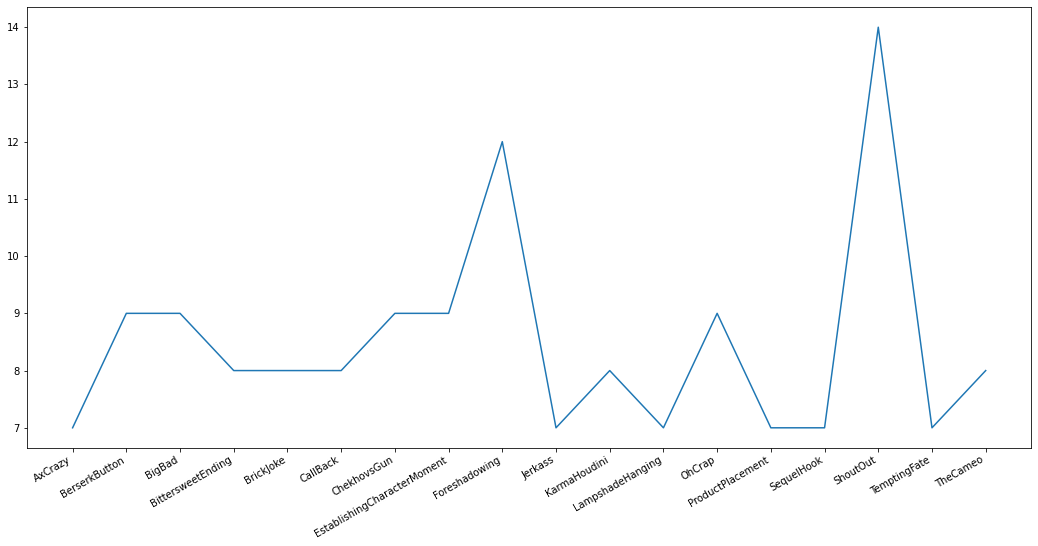

In [41]:
#plot counted up

lists = sorted(countedup.items()) # sorted by key, return a list of tuples


#Delete all <Val> occuring tropes
countedup = {key:val for key, val in lists if val >= 7}
        
lists = sorted(countedup.items()) # sorted by key, return a list of tuples
print(lists)

x, y = zip(*lists) # unpack a list of pairs into two tuples


time = x
values = y
plt.rcParams["figure.figsize"] = [18,9]

fig, ax = plt.subplots()
ax.plot_date(time, values, marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()




<BarContainer object of 2 artists>

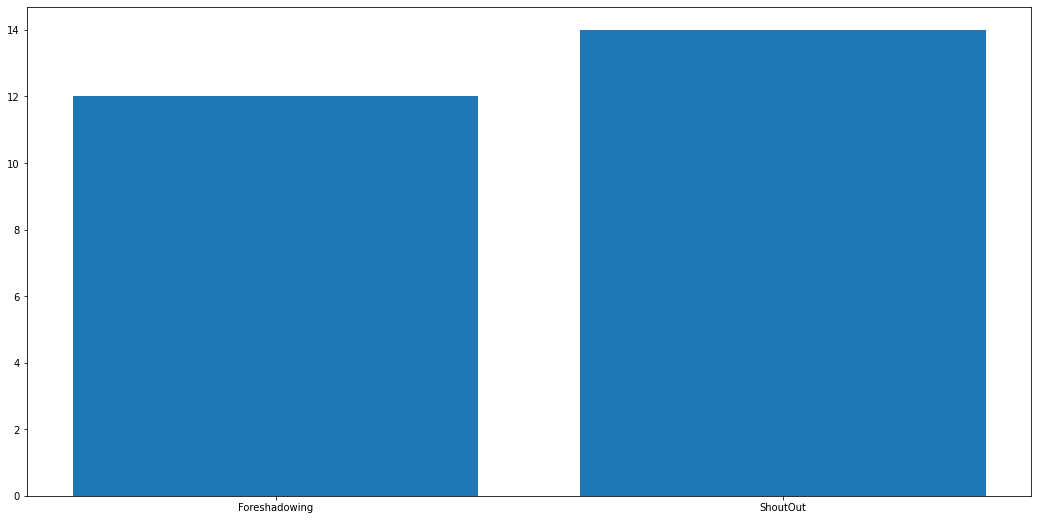

In [34]:
plt.bar(x,
 
        y)